In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:
unscaled_data = pd.read_csv('./data/feature_selection/resale_feature_selection_not_scaled.csv')

In [3]:
unscaled_data.head()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_JURONG EAST,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price
0,44.0,189,1.003996,55.416667,0,0,0,1,0,0,...,0,0,0,0,0,0,40,0,0,267000.0
1,49.0,189,0.304447,53.500000,0,0,0,0,1,0,...,0,0,0,0,0,0,37,0,0,300000.0
2,44.0,189,0.416219,54.083333,0,0,0,0,1,0,...,0,0,0,0,0,0,37,0,0,280000.0
3,44.0,189,0.416219,54.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,37,0,0,282000.0
4,45.0,189,1.280521,62.083333,0,0,0,1,0,0,...,0,0,0,0,0,0,20,0,0,289800.0


In [4]:
unscaled_data.describe()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_JURONG EAST,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4.410000e+03
mean,94.821156,234.816780,0.859754,73.789021,0.036508,0.265986,0.002041,0.170975,0.229478,0.016780,...,0.018821,0.053968,0.002041,0.003855,0.014512,0.085941,18.998639,0.003855,0.004989,5.556083e+05
std,24.082048,101.834821,0.453918,15.054199,0.187572,0.441907,0.045134,0.376530,0.420545,0.128461,...,0.135907,0.225981,0.045134,0.061975,0.119604,0.280309,17.129396,0.061975,0.070462,1.686516e+05
min,37.000000,6.000000,0.036138,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.300000e+05
25%,73.000000,152.000000,0.498500,61.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.300000e+05
50%,93.000000,223.000000,0.787363,73.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,5.350000e+05
75%,111.750000,362.000000,1.160318,90.583333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,6.480000e+05
max,192.000000,387.000000,3.479159,95.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,1.000000,1.000000,1.340000e+06


In [5]:
unscaled_data.columns

Index(['floor_area_sqm', 'total_resales_in_town', 'nearest_mrt_dist',
       'remaining_lease', 'town_BUKIT MERAH', 'flat_type_3 ROOM',
       'street_name_CANTONMENT RD', 'storey_range_01 TO 03',
       'storey_range_04 TO 06', 'storey_range_19 TO 21',
       'flat_model_Apartment', 'flat_model_Maisonette', 'town_PASIR RIS',
       'street_name_DAWSON RD', 'flat_model_Premium Apartment',
       'nearest_mall_dist', 'total_nearby_mrt', 'street_name_ANG MO KIO ST 51',
       'flat_model_New Generation', 'nearest_bus_stop_Blk 18',
       'town_SEMBAWANG', 'flat_type_2 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_model_Standard', 'flat_model_Type S1',
       'flat_model_Model A', 'storey_range_16 TO 18', 'flat_model_Simplified',
       'flat_model_DBSS', 'town_MARINE PARADE', 'flat_model_Improved',
       'storey_range_07 TO 09',
       'nearest_primary_school_ZHANGDE PRIMARY SCHOOL',
       'street_name_JLN BAHAGIA', 'town_BUKIT BATOK', 'town_BUKIT PANJANG',
       'tow

In [12]:
unscaled_data['price_per_sqm'] = unscaled_data['resale_price']/unscaled_data['floor_area_sqm']

In [13]:
unscaled_data.head()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price,price_per_sqm
0,44.0,189,1.003996,55.416667,0,0,0,1,0,0,...,0,0,0,0,0,40,0,0,267000.0,6068.181818
1,49.0,189,0.304447,53.500000,0,0,0,0,1,0,...,0,0,0,0,0,37,0,0,300000.0,6122.448980
2,44.0,189,0.416219,54.083333,0,0,0,0,1,0,...,0,0,0,0,0,37,0,0,280000.0,6363.636364
3,44.0,189,0.416219,54.083333,0,0,0,0,0,0,...,0,0,0,0,0,37,0,0,282000.0,6409.090909
4,45.0,189,1.280521,62.083333,0,0,0,1,0,0,...,0,0,0,0,0,20,0,0,289800.0,6440.000000


In [14]:
unscaled_data.describe()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price,price_per_sqm
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4.410000e+03,4410.000000
mean,94.821156,234.816780,0.859754,73.789021,0.036508,0.265986,0.002041,0.170975,0.229478,0.016780,...,0.053968,0.002041,0.003855,0.014512,0.085941,18.998639,0.003855,0.004989,5.556083e+05,5923.272014
std,24.082048,101.834821,0.453918,15.054199,0.187572,0.441907,0.045134,0.376530,0.420545,0.128461,...,0.225981,0.045134,0.061975,0.119604,0.280309,17.129396,0.061975,0.070462,1.686516e+05,1319.972500
min,37.000000,6.000000,0.036138,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.300000e+05,3403.508772
25%,73.000000,152.000000,0.498500,61.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.300000e+05,5066.342441
50%,93.000000,223.000000,0.787363,73.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,5.350000e+05,5585.236118
75%,111.750000,362.000000,1.160318,90.583333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,6.480000e+05,6400.000000
max,192.000000,387.000000,3.479159,95.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,1.000000,1.000000,1.340000e+06,13723.404255


In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(unscaled_data, test_size = 0.2, random_state = 42)

In [16]:
# perform scaling on quantitative features

# total_resales_in_town
# nearest_mrt_dist
# remaining_lease'
    
# nearest_mall_dist
# total_nearby_mrt

# total_resales_in_block
# total_resales_in_street

In [46]:
train_y = train_df['price_per_sqm']
train_x = train_df.drop(['price_per_sqm', 'floor_area_sqm', 'resale_price'], axis=1)

test_y = test_df['price_per_sqm']
test_x = test_df.drop(['price_per_sqm', 'floor_area_sqm', 'resale_price'], axis=1)

In [47]:
reg = LinearRegression().fit(train_x, train_y)

In [93]:
import statsmodels.api as sm

train_x2 = sm.add_constant(train_x)
est = sm.OLS(train_y, train_x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     271.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:48:12   Log-Likelihood:                -27013.
No. Observations:                3528   AIC:                         5.417e+04
Df Residuals:                    3455   BIC:                         5.462e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [97]:
est2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
=========================================================================================================
Model:                            OLS                          Adj. R-squared:                 0.847     
Dependent Variable:               price_per_sqm                AIC:                            54171.5485
Date:                             2023-03-25 19:50             BIC:                            54621.8480
No. Observations:                 3528                         Log-Likelihood:                 -27013.   
Df Model:                         72                           F-statistic:                    271.3     
Df Residuals:                     3455                         Prob (F-statistic):             0.00      
R-squared:                        0.850                        Scale:                          2.6737e+05
---------------------------------------------------------------------------------------------------------
                                                  Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
---------------------------------------------------------------------------------------------------------
const                                            4246.0972 526.1288   8.0705 0.0000  3214.5422  5277.6521
total_resales_in_town                              -5.1221   0.1742 -29.3955 0.0000    -5.4637    -4.7805
nearest_mrt_dist                                 -392.0953  28.6666 -13.6778 0.0000  -448.3006  -335.8900
remaining_lease                                    64.8747   1.0131  64.0389 0.0000    62.8884    66.8609
town_BUKIT MERAH                                  543.1916 119.3344   4.5518 0.0000   309.2185   777.1647
flat_type_3 ROOM                                 -697.5989 523.3584  -1.3329 0.1826 -1723.7221   328.5242
street_name_CANTONMENT RD                        2219.9375 441.8537   5.0241 0.0000  1353.6167  3086.2584
storey_range_01 TO 03                            -620.6503  36.0889 -17.1978 0.0000  -691.4081  -549.8925
storey_range_04 TO 06                            -435.5614  34.5407 -12.6101 0.0000  -503.2837  -367.8391
storey_range_19 TO 21                             332.5007  75.6587   4.3947 0.0000   184.1603   480.8411
flat_model_Apartment                              189.7051 132.5014   1.4317 0.1523   -70.0839   449.4941
flat_model_Maisonette                             631.4407 134.9054   4.6806 0.0000   366.9382   895.9431
town_PASIR RIS                                   -777.9371  63.8066 -12.1921 0.0000  -903.0395  -652.8347
street_name_DAWSON RD                            2057.4598 210.3423   9.7815 0.0000  1645.0520  2469.8676
flat_model_Premium Apartment                     -219.4219  74.5124  -2.9448 0.0033  -365.5147   -73.3290
nearest_mall_dist                                -159.0245  27.0358  -5.8820 0.0000  -212.0324  -106.0166
total_nearby_mrt                                   87.7080  12.6090   6.9560 0.0000    62.9861   112.4299
street_name_ANG MO KIO ST 51                     1104.8803 184.8395   5.9775 0.0000   742.4746  1467.2860
flat_model_New Generation                        -266.8412  75.2446  -3.5463 0.0004  -414.3697  -119.3128
nearest_bus_stop_Blk 18                          1300.3506 230.7436   5.6355 0.0000   847.9429  1752.7583
town_SEMBAWANG                                  -1078.6626  75.6963 -14.2499 0.0000 -1227.0766  -930.2486
flat_type_2 ROOM                                 -222.1454 525.2664  -0.4229 0.6724 -1252.0094   807.7186
flat_type_5 ROOM                                -1094.6596 523.6985  -2.0902 0.0367 -2121.4494   -67.8697
flat_type_EXECUTIVE                             -1369.9033 533.0292  -2.5700 0.0102 -2414.9874  -324.8193
flat_model_Standard                              -381.7736  90.3899  -4.2236 0.0000  -558.9967  -204.5505
flat_model_Type S1                               -445.4836 418.125

In [48]:
num_test = test_x.shape[0]
num_pred_price = test_x.shape[1] 
num_pred_ppsqm = test_price_x.shape[1]

def adj_r2(r2_score, n, k):
    return 1 - (1 - r2_score) * (n - 1) / (n - k - 1)

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

pred_y = reg.predict(test_x) 

print(f"RMSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=False)}")

print(f"MSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'])}" )

r2 = r2_score(pred_y * test_df['floor_area_sqm'], test_df['resale_price'])

print(f"R2: {r2}")
      
print(f"Adj R2: {adj_r2(r2, num_test, num_pred_ppsqm)}")

RMSE: 49426.826997841184
MSE: 2443011227.0745225
MAPE: 0.06620348238280643
R2: 0.9028775431364398
Adj R2: 0.8939716425070674


In [65]:
train_price_y = train_df['resale_price']
train_price_x = train_df.drop(['price_per_sqm', 'resale_price'], axis=1)

test_price_y = test_df['resale_price']
test_price_x = test_df.drop(['price_per_sqm', 'resale_price'], axis=1)

In [66]:
train_df.describe()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price,price_per_sqm
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,...,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3.528000e+03,3528.000000
mean,95.090788,234.252551,0.856008,73.763251,0.035998,0.258503,0.002551,0.174036,0.227608,0.016156,...,0.052721,0.002268,0.004252,0.014172,0.085601,18.755385,0.004819,0.004535,5.570365e+05,5918.672653
std,23.925711,102.023088,0.452228,14.959429,0.186311,0.437874,0.050450,0.379194,0.419347,0.126095,...,0.223508,0.047572,0.065076,0.118218,0.279813,16.906956,0.069258,0.067200,1.694671e+05,1320.094818
min,37.000000,6.000000,0.036138,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.300000e+05,3403.508772
25%,74.000000,152.000000,0.496064,61.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.330000e+05,5068.261755
50%,93.000000,223.000000,0.782662,73.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,5.350000e+05,5567.270033
75%,111.000000,362.000000,1.153094,90.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,6.452220e+05,6397.256483
max,192.000000,387.000000,3.479159,95.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,1.000000,1.000000,1.340000e+06,13723.404255


In [67]:
reg2 = LinearRegression().fit(train_price_x, train_price_y)
reg2.score(train_price_x, train_price_y)

0.9049534725102613

In [68]:
pred_price_y = reg2.predict(test_price_x) 

print(f"RMSE: {mean_squared_error(pred_price_y, test_price_y, squared=False)}")

print(f"MSE: {mean_squared_error(pred_price_y, test_price_y, squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_price_y, test_price_y)}" )

r2 = r2_score(np.array(pred_price_y), test_price_y)

print(f"R2: {r2}")
      
print(f"Adj R2: {adj_r2(r2, num_test, num_pred_price)}")

RMSE: 54316.37118057538
MSE: 2950268178.2260394
MAPE: 0.0780557332344016
R2: 0.8854189654232654
Adj R2: 0.8750669660122485


In [131]:
print("TRAIN")
print(reg.score(train_x, train_y))
print(reg2.score(train_price_x, train_price_y))

print('\nTEST')
print(reg.score(test_x, test_y))
print(reg2.score(test_price_x, test_price_y))

TRAIN
0.8497037887882943
0.9049534725102613

TEST
0.8461168378576372
0.8919312720249223


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42, learning_rate=0.01, max_depth=10, n_estimators=1500, subsample=0.2)
reg.fit(train_x, train_y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=1500,
                          random_state=42, subsample=0.2)

In [71]:
print(reg.score(train_x, train_y))
print(reg.score(test_x, test_y))

0.9817539632699481
0.9210077325852002


In [72]:
pred_y = reg.predict(test_x) 

print(f"RMSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=False)}")

print(f"MSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'])}" )

r2 = r2_score(pred_y * test_df['floor_area_sqm'], test_df['resale_price'])

print(f"R2: {r2}")
      
print(f"Adj R2: {adj_r2(r2, num_test, num_pred_ppsqm)}")

RMSE: 35003.75237082601
MSE: 1225262680.0381076
MAPE: 0.04342378394524176
R2: 0.9519062895582234
Adj R2: 0.9474962095424967


In [84]:
print(sorted_idx)

print(train_x.keys()[sorted_idx])

[51 38 41 16 29 39 47 66 52 69 59 45 40  9 67 49 61 72 24 23 27 50 19  5
 64 54 63 10 17 42 11 53 62 13 35 36 22 37  8 48 46 18 68 34 55 44 21 30
 65 57 26 32 60 71 56 31 25 20  4 12  7 28 33 58  3  6 43 70 15 14  0  1
  2]
Index(['street_name_ANG MO KIO AVE 3',
       'nearest_school_WOODLANDS SECONDARY SCHOOL', 'nearest_mrt_Kallang',
       'street_name_ANG MO KIO ST 51', 'town_MARINE PARADE',
       'nearest_mrt_Admiralty', 'street_name_TELOK BLANGAH ST 31',
       'storey_range_31 TO 33', 'street_name_ANG MO KIO ST 44',
       'nearest_mrt_Sengkang', 'town_SENGKANG',
       'nearest_school_GAN ENG SENG PRIMARY SCHOOL', 'street_name_MCNAIR RD',
       'flat_model_Apartment',
       'nearest_primary_school_RADIN MAS PRIMARY SCHOOL',
       'nearest_bus_stop_Opp Blk 565', 'town_WOODLANDS',
       'storey_range_28 TO 30', 'flat_model_Type S1', 'flat_model_Standard',
       'flat_model_Simplified', 'town_CENTRAL AREA', 'town_SEMBAWANG',
       'street_name_CANTONMENT RD', 'town_JURONG E

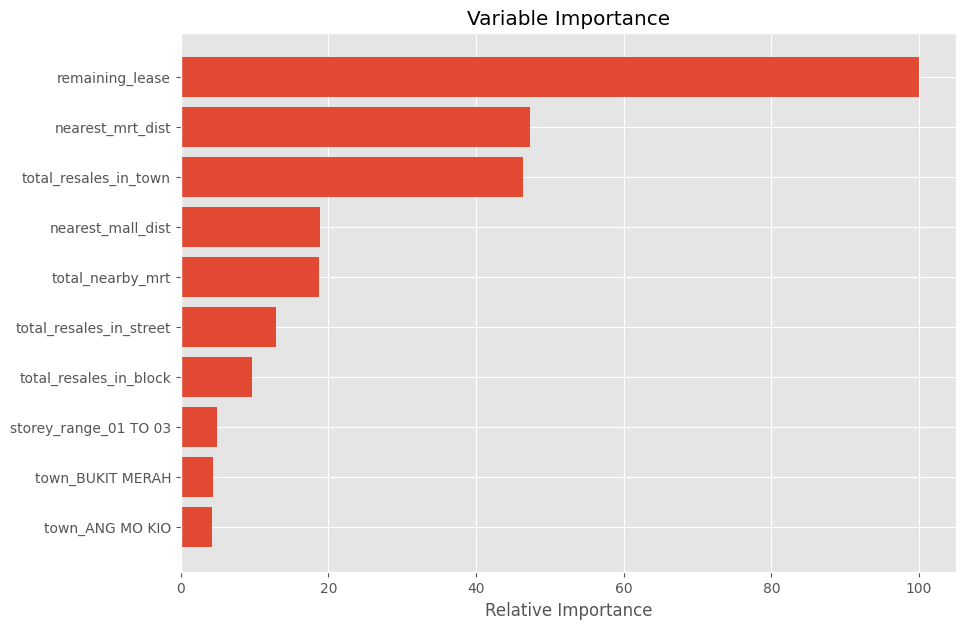

In [92]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 7))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_x.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [74]:
reg2 = GradientBoostingRegressor(random_state=1)
reg2.fit(train_price_x, train_price_y)

GradientBoostingRegressor(random_state=1)

In [75]:
pred_price_y = reg2.predict(test_price_x) 

print(f"RMSE: {mean_squared_error(pred_price_y, test_price_y, squared=False)}")

print(f"MSE: {mean_squared_error(pred_price_y, test_price_y, squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_price_y, test_price_y)}" )

r2 = r2_score(np.array(pred_price_y), test_price_y)

print(f"R2: {r2}")
      
print(f"Adj R2: {adj_r2(r2, num_test, num_pred_price)}")

RMSE: 50644.27956427074
MSE: 2564843052.584011
MAPE: 0.06185336184942124
R2: 0.8842771840825315
Adj R2: 0.8738220286840473


In [137]:
print("TRAIN")
print(reg.score(train_x, train_y))
print(reg2.score(train_price_x, train_price_y))

print('\nTEST')
print(reg.score(test_x, test_y))
print(reg2.score(test_price_x, test_price_y))

TRAIN
0.8838548946496559
0.9255936939558768

TEST
0.8662866062721712
0.9060494472352904
